In [1]:
# https://github.com/tensorflow/models/blob/master/object_detection/object_detection_tutorial.ipynb

# import

In [2]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# Env Setup

In [3]:

# This is needed to display the images.
%matplotlib inline

In [4]:

from utils import label_map_util

from utils import visualization_utils as vis_util

In [5]:
# What model to download.

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = os.path.join('xiao_pet_res', 'output_inference_graph.pb')

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('dataset', 'TFRECORD', 'dog_cat_label.pbtxt')

NUM_CLASSES = 2

# Load a (frozen) Tensorflow model into memory.

In [6]:
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

# Loading label map

In [7]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

In [8]:
label_map

item {
  name: "dog"
  id: 1
}
item {
  name: "cat"
  id: 2
}

In [9]:
category_index

{1: {'id': 1, 'name': 'dog'}, 2: {'id': 2, 'name': 'cat'}}

# Helper code

In [10]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

# Detection

In [25]:
# For the sake of simplicity we will use only 2 images:
# image1.jpg
# image2.jpg
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
target_class = "dog"
PATH_TO_TEST_IMAGES_DIR = os.path.join('dataset', 'self_divide', 'eval', target_class)
# TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, target_class + '.{}.jpg'.format(i)) for i in range(1, 3) ]
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, target_class + '.30.jpg') ]
# TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, target_class + '.6.jpg') ]
TEST_IMAGE_PATHS = ["C:/Users/VIPLAB/Desktop/dog_vs_cat_detection/dataset/self_divide/eval/cat/cat.1216.jpg"]
# TEST_IMAGE_PATHS = ["C:/Users/VIPLAB/Desktop/dog_vs_cat_detection/dataset/self_divide/eval/cat/cat.30.jpg"]
# TEST_IMAGE_PATHS = ["C:/Users/VIPLAB/Desktop/dog_vs_cat_detection/dataset/self_divide/eval/cat/cat.174.jpg"]
# TEST_IMAGE_PATHS = ["C:/Users/VIPLAB/Desktop/dog_vs_cat_detection/dataset/self_divide/eval/dog/dog.6.jpg"]
# TEST_IMAGE_PATHS = ["C:/Users/VIPLAB/Desktop/dog_vs_cat_detection/dataset/self_divide/eval/dog/dog.67.jpg"]
# TEST_IMAGE_PATHS = ["C:/Users/VIPLAB/Desktop/dog_vs_cat_detection/dataset/self_divide/train/dog/dog.12168.jpg"]
# TEST_IMAGE_PATHS = ["C:/Users/VIPLAB/Desktop/preprocess_py/brian-lee.jpg"]
# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

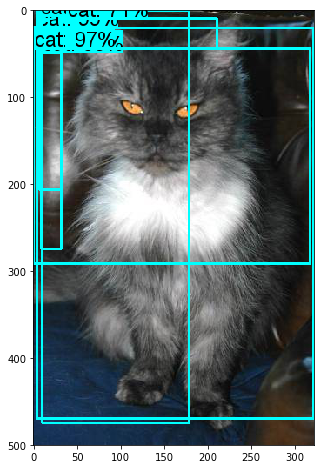

In [26]:
with detection_graph.as_default():
  with tf.Session(graph=detection_graph) as sess:
    for image_path in TEST_IMAGE_PATHS:
      image = Image.open(image_path)
      # the array based representation of the image will be used later in order to prepare the
      # result image with boxes and labels on it.
      image_np = load_image_into_numpy_array(image)
      # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
      image_np_expanded = np.expand_dims(image_np, axis=0)
      image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
      # Each box represents a part of the image where a particular object was detected.
      boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
      # Each score represent how level of confidence for each of the objects.
      # Score is shown on the result image, together with the class label.
      scores = detection_graph.get_tensor_by_name('detection_scores:0')
      classes = detection_graph.get_tensor_by_name('detection_classes:0')
      num_detections = detection_graph.get_tensor_by_name('num_detections:0')
      # Actual detection.
      (boxes, scores, classes, num_detections) = sess.run(
          [boxes, scores, classes, num_detections],
          feed_dict={image_tensor: image_np_expanded})
      # Visualization of the results of a detection.
      vis_util.visualize_boxes_and_labels_on_image_array(
          image_np,
          np.squeeze(boxes),
          np.squeeze(classes).astype(np.int32),
          np.squeeze(scores),
          category_index,
          use_normalized_coordinates=True,
          line_thickness=3)
      plt.figure(figsize=IMAGE_SIZE)
      plt.imshow(image_np)